# Проект: Бурёнка #



### Признаки ferma_dad.csv:
* **id** — уникальный идентификатор коровы.
* **Имя Папы** — имя папы коровы.## Описание данных: 

### Количество датасетов (их описаниие): 
1. **ferma_main.csv** - содержит данные о стаде фермера на текущий момент.
2. **ferma_dad.csv** - хранит имя папы каждой коровы в стаде фермера.
3. **cow_buy.csv** - это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

### Признаки ferma_main.csv:

* **id** — уникальный идентификатор коровы.
* **Удой**, кг — масса молока, которую корова даёт в год (в килограммах).
* **ЭКЕ** (Энергетическая кормовая единица) — показатель питательности корма коровы.
* **Сырой протеин**, г — содержание сырого протеина в корме (в граммах).
* **СПО** (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* **Порода** — порода коровы.
* **Тип пастбища** — ландшафт лугов, на которых паслась корова.
* **порода папы_быка** — порода папы коровы.
* **Жирность**,% — содержание жиров в молоке (в процентах).
* **Белок**,% — содержание белков в молоке (в процентах).
* **Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

### Признаки cow_buy.csv:
* **Порода** — порода коровы.
* **Тип пастбища** — ландшафт лугов, на которых паслась корова.
* **порода папы_быка** — порода папы коровы.
* **Имя_папы** — имя папы коровы.
* **Текущая_жирность**,% — содержание жиров в молоке (в процентах).
* **Текущий_уровень_белок**,% — содержание белков в молоке (в процентах).
* **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


### Замечания и предложения по данным:

#### Данные в файлах **ferma_main.csv** и **cow_buy.csv** похожи, но у датасета **cow_buy.csv несколько особенностей**.
1. Содержание **белков и жиров в молоке указано на момент продажи** — когда «ЭкоФерма» давала коровам свой корм.
2. Параметры корма **ЭКЕ** (Энергетическая кормовая единица), **Сырой протеин**, г и **СПО** (Сахаро-протеиновое соотношение) **отсутствуют**. Технологи заказчика пересмотрели подход к кормлению: для новых коров **планируется увеличить значения каждого из этих параметров на 5%.**
3. Отсутствуют признаки **Удой**, кг и **Вкус молока**. ***Это целевые признаки, именно их предстоит предсказать!***

#### Признаки в датасете ferma_main.csv можно разделить на группы.
1. Характеристики коровы: **id, Порода, порода папы_быка, Возраст.**
2. Характеристики корма: **ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).**
3. Характеристика пастбища: **Тип пастбища.**
4. Характеристики молока: **Удой, кг, Жирность,%, Белок,%, Вкус молока.**
**Такое разделение поможет понять, как взаимосвязаны признаки в датасете.**

### Цель проекта:
#### Разработать модель машинного обучения, которая поможет  управлять рисками и принимать объективное решение о покупке.
#### Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак **Удой**);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак **Вкус молока**).
#### С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

## 1. Загрузка данных

In [1]:
#для начала импорт. библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from IPython.display import display

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
#один против всех 
from sklearn.multiclass import OneVsRestClassifier

# загружаем класс для работы с пропусками для категориальных
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (precision_score, recall_score, confusion_matrix,
                     accuracy_score, mean_squared_error, mean_absolute_error,
                     r2_score, accuracy_score, recall_score)

#звгружаем евкилодо и косусное растояния
from scipy.spatial.distance import cosine, euclidean 

# импортируем класс RandomizedSearchCV (нужно ли еще 2?)
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Загрузим данные в датафреймы
ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')

### 1. 1 Анализуем ferma_main.csv:

In [3]:
#Функция для открытия таблицы просмотра, анализа и приведения названия колонок к виду.
def analist (data):
    data.columns = data.columns.str.replace('_', ' ')
    data.columns = data.columns.str.replace('Имя Папы', 'Имя папы')
    data.columns = data.columns.str.replace(',', ' ')
    data.columns = data.columns.str.replace('Текущая жирность,%', 'Жирность %')
    data.columns = data.columns.str.replace('Текущий уровень белок,%', 'Белок %')
    data.columns = data.columns.str.replace('Текущая жирность %', 'Жирность %')
    data.columns = data.columns.str.replace('Текущий уровень белок %', 'Белок %')
    data.columns = data.columns.str.replace('порода папы быка', 'Порода папы быка')
    print('Количетсво строк и столбцов в таблице:', data.shape)
    display(data.head())
    print('Количество дубликатов в таблице :', data.duplicated().sum())
    display(data.describe())
    data.info()
    print('Количество пропусков:', data.isna().sum())

In [4]:
analist(ferma_main)

Количетсво строк и столбцов в таблице: (634, 12)


,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,Жирность %,Белок %,Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Количество дубликатов в таблице : 5


,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Жирность %,Белок %
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой  кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин  г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   Порода папы быка                       634 non-null    object 
 8   Жирность %                             634 non-null    float64
 9   Белок %                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

### Вывод по таблице ferma_main: 
* 634 строки и 12 столбцов.
* Пропущенных значений нет.
* Обнаружено **5 дубликатов**, которые стоит удалить.
* Типы все совпадают. Хотя **Возраст** смущает, изменить на булевый тип.

### 1. 2 Анализуем ferma_dad:

In [5]:
analist(ferma_dad)

Количетсво строк и столбцов в таблице: (629, 2)


,id,Имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Количество дубликатов в таблице : 0


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
Количество пропусков: id          0
Имя папы    0
dtype: int64


### Вывод по таблице ferma_dad: 
 * В таблице 629 строк. Для объединения данных с таблицей **ferma_main метом merge**, следует определить аргумент, чтобы не потерять значения. При удалении дубликатов из первой таблицы сторок будет равное количество.
 * Пропусков в таблице нет.
 * Типы данных совпадает

### 1. 3 Анализуем cow_buy:

In [6]:
analist(cow_buy)

Количетсво строк и столбцов в таблице: (20, 7)


,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Количество дубликатов в таблице : 4


,Жирность %,Белок %
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя папы          20 non-null     object 
 4   Жирность %        20 non-null     float64
 5   Белок %           20 non-null     float64
 6   Возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
Количество пропусков: Порода              0
Тип пастбища        0
Порода папы быка    0
Имя папы            0
Жирность %          0
Белок %             0
Возраст             0
dtype: int64


### Вывод по таблице cow_buy: 
 * В таблице 7 столбцов и 20 строк.
 * Пропусков нет.
 * Следует изменить тип для Текущей жирности, уровня белка и возроста на float.

In [7]:
#ferma_main.columns = ['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
#ferma_dad.columns = ['id', 'dad_name']
#cow_buy.columns = ['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content', 'protein', 'age']

### Общий вывод по первому шагу.

Мы изучили данные в трех таблицах. Признаки соответствуют описанию задачи и изученным в прошлых спринтах стандартам оформления данных. Найдены дубликаты в данных. Это исправим в предобработке данных.

## 2. Предобработка данных

### 2.1 Проверка дубликатов 

In [8]:
display(ferma_main[ferma_main.duplicated()])

,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,Жирность %,Белок %,Вкус молока,Возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [9]:
#удаляем дубликаты
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

### 2.2 Уникальные значения (неявные дубликаты)

In [10]:
# проверим, что правильно записали категориальные признаки
def uni (data):
    for i in ['Порода', 'Тип пастбища', 'Порода папы быка', 'Возраст']:
        print (data[i].unique())

In [11]:
uni (ferma_main)
print()
uni (cow_buy)

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['более_2_лет' 'менее_2_лет']

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['более_2_лет' 'менее_2_лет']


Имеются неявные дубликаты в таблице **ferma_main** признаках **Тип пастбища** и **Порода папы быка**. 
Имеются неявные дубликаты в таблице **cow_buy** признаке **Порода**

In [12]:
#исправляем названия и приводим к красивому виду таблицу
ferma_main['Порода'] = ferma_main['Порода'].replace('РефлешнСоверинг', 'Рефлешн Соверинг')
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Равнинные', 'равнинное')
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Равнинное', 'равнинное')
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Холмистое', 'холмистое')
ferma_main['Порода папы быка'] = ferma_main['Порода папы быка'].replace('Айдиалл', 'Айдиал')
cow_buy['Порода'] = cow_buy['Порода'].replace('РефлешнСоверинг', 'Рефлешн Соверинг')

In [13]:
#проверяем 
uni (ferma_main)
print()
uni (cow_buy)

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['равнинное' 'холмистое']
['Айдиал' 'Соверин']
['более_2_лет' 'менее_2_лет']

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['более_2_лет' 'менее_2_лет']


### 2.3 Типы данных 

In [14]:
ferma_main.info()
display(ferma_main.head())
cow_buy.info()
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой  кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин  г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   Порода папы быка                       629 non-null    object 
 8   Жирность %                             629 non-null    float64
 9   Белок %                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,Жирность %,Белок %,Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   Порода папы быка  20 non-null     object 
 3   Имя папы          20 non-null     object 
 4   Жирность %        20 non-null     float64
 5   Белок %           20 non-null     float64
 6   Возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Сомневаюсь насчет Возроста, наверно, стоит сделать его булевым в двух таблицах.

Таблица **ferma_main** всё в порядке, но меня смущает Сырой протеин в граммах с типом int. (Возможно тут нужны кг и float).
Оставлю пока как есть. 

### Вывод: 
1. Удалили дубликаты в таблице ferma_main
2. Проверили уникальные значения и выявили ошибки в данных(неявные дубликаты). Исправили, переименовав их.
3. Пропусков не было обнаружино.
4. Тип данный совпадает с данными указанными в таблицах.

## 3. Исследовательский анализ данных

### 3.1 Общий анализ таблиц

In [15]:
display(ferma_main.describe())

,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Жирность %,Белок %
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Признак Удой с максимальным значение в 45 616 кг, кажется очень большим (среднее - 6 188 кг, медиана - 6 133  кг)

In [16]:
ferma_main.sort_values(by='Удой  кг', ascending=False).head()

,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,Жирность %,Белок %,Вкус молока,Возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,Рефлешн Соверинг,холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет
294,295,7197,15.6,2241,0.94,Рефлешн Соверинг,холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет


Только одно значение id 17 находиться в выбросах. Стоит удалить из таблиц ferma_main и ferma_dad.

In [17]:
# удаление выброса
ferma_main = ferma_main[ferma_main['Удой  кг'] < 8000]
# удаление связанной строки в таблице df_dad
ferma_dad = ferma_dad[~(ferma_dad['id'] == 17)]

In [18]:
#display(ferma_dad.describe())
#Нет смысла рассматривать таблицу display(ferma_main.describe()) (имеет категориальные значения)

In [19]:
display(cow_buy.describe())

,Жирность %,Белок %
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


По данным из этой таблицы тоже ничего не вижу. Стоит сделать графики для каждого признака.

### 3.2 Анализ количественных  и категориальных признаков

In [20]:
#импорт библиотек дополнительных
import warnings
import matplotlib.ticker as ticker


In [21]:
#функция для количественных признаков
def diagram(data, column, title):
    sns.set(rc={"figure.figsize": (15, 5)})

    fig,axes=plt.subplots(1,2)

    sns.histplot(data=data[column], bins=20, ax=axes[0])
    axes[0].set(ylabel='Количество коров', xlabel=column)

    sns.boxplot(data=data[column], ax=axes[1])
    axes[1].set(ylabel=column)

    plt.suptitle(title)
    
    plt.show()

In [22]:
#функция для категориальных признаков 
def diagram_cat(data, column, title):
    sns.countplot(data = data, x=column)

    plt.suptitle(title)
    plt.show()

#### 3.2.1 Таблица ferma_main

In [23]:
#проверить колонки 
print(ferma_main.columns)

Index(['id', 'Удой  кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин  г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность %', 'Белок %',
       'Вкус молока', 'Возраст'],
      dtype='object')


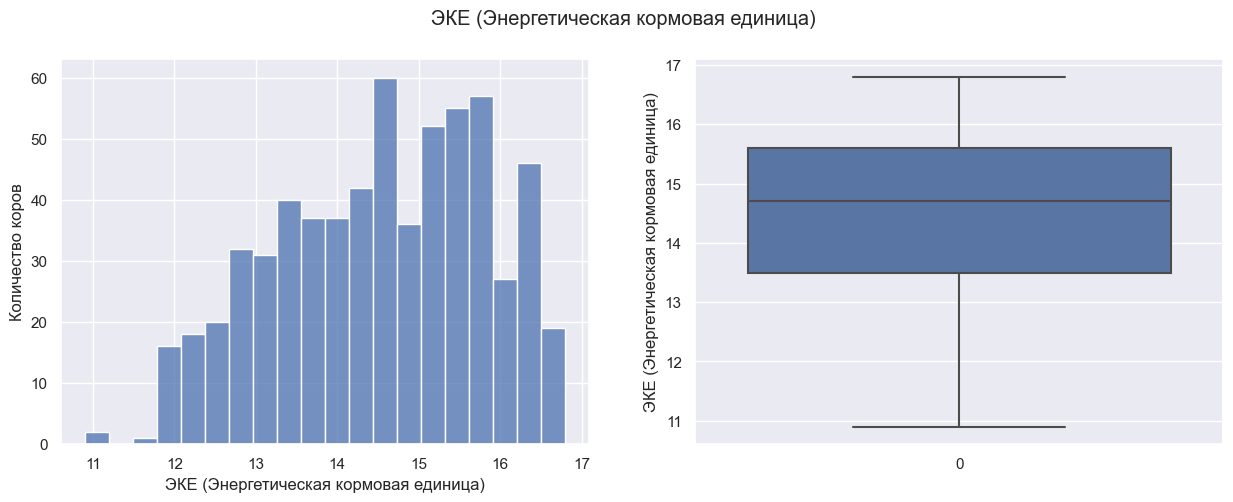

In [24]:
#Строим диаграмму ЭКЕ (Энергетическая кормовая единица)
diagram(ferma_main, 'ЭКЕ (Энергетическая кормовая единица)', 'ЭКЕ (Энергетическая кормовая единица)')

**Нормальное распределение.** 

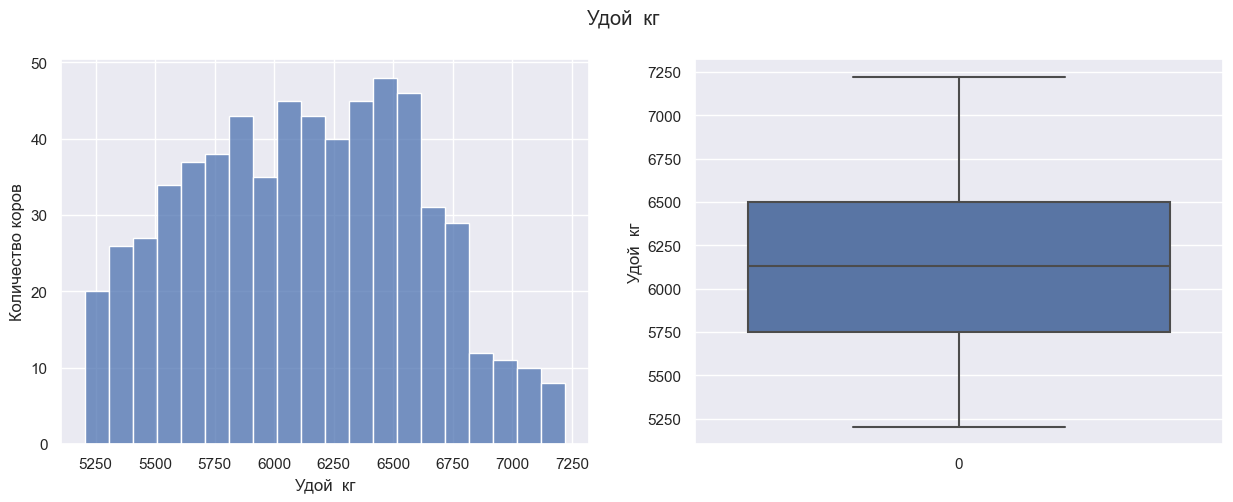

In [25]:
#Строим диаграмму Удой  кг
diagram(ferma_main, 'Удой  кг', 'Удой  кг')

**Приближено к нормальному распределению.** 

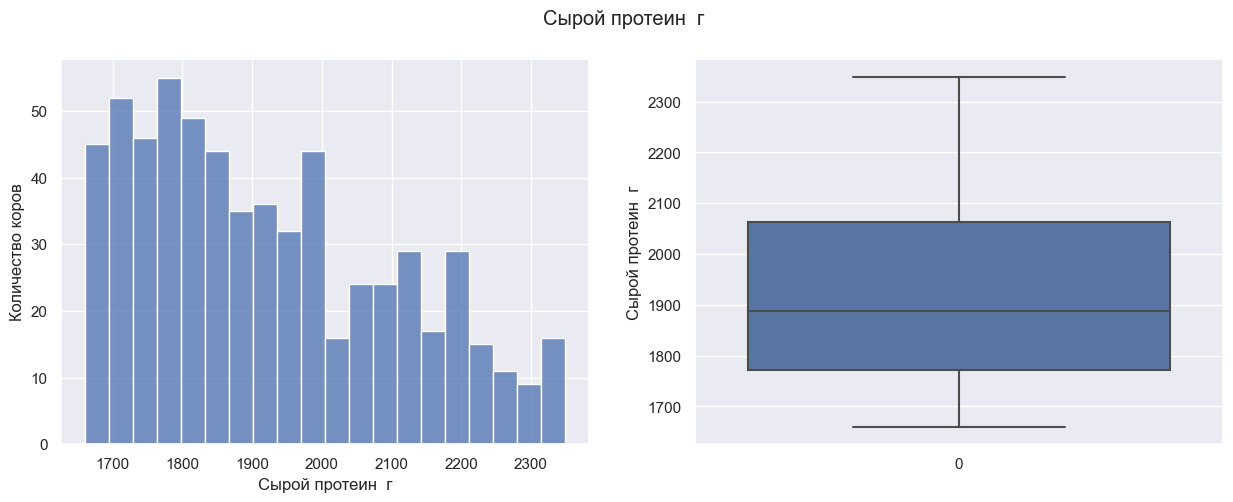

In [26]:
#Строим диаграмму Сырой протеин  г
diagram(ferma_main, 'Сырой протеин  г', 'Сырой протеин  г')

**Не Нормальное распределение.** Похоже на Логнормальное распределение или Вейбулла. 

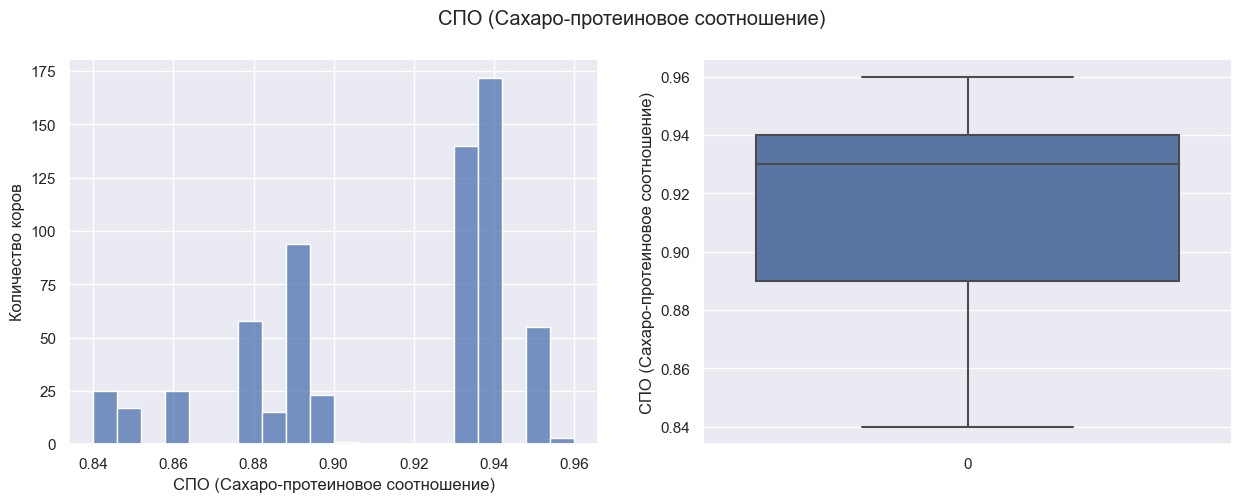

In [27]:
#Строим диаграмму СПО (Сахаро-протеиновое соотношение)
diagram(ferma_main, 'СПО (Сахаро-протеиновое соотношение)', 'СПО (Сахаро-протеиновое соотношение)')

**Не нормальное распределение**

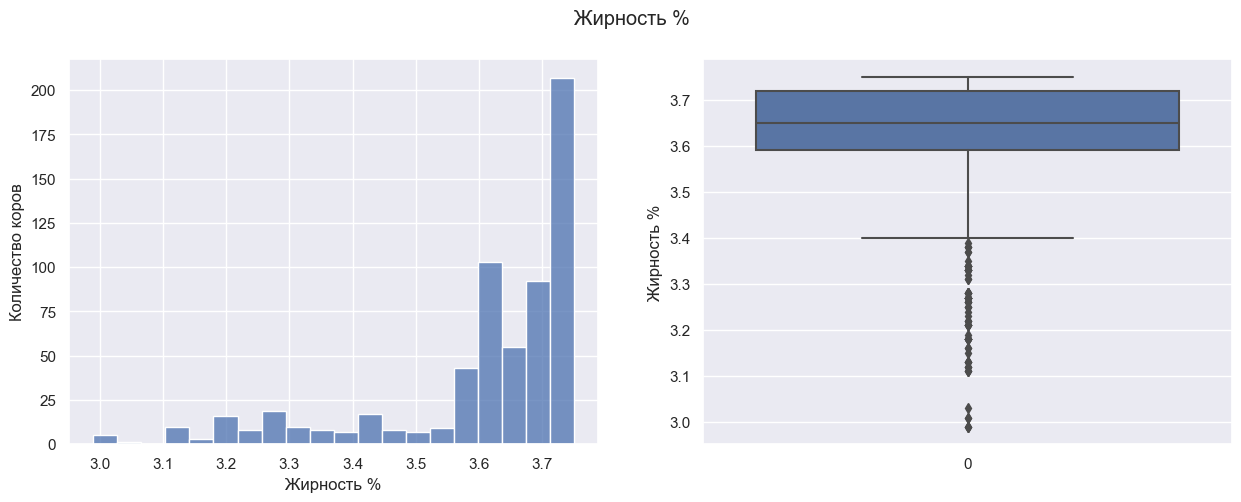

In [28]:
#Строим диаграмму Жирность %
diagram(ferma_main, 'Жирность %', 'Жирность %')

**Не нормальное распределение**

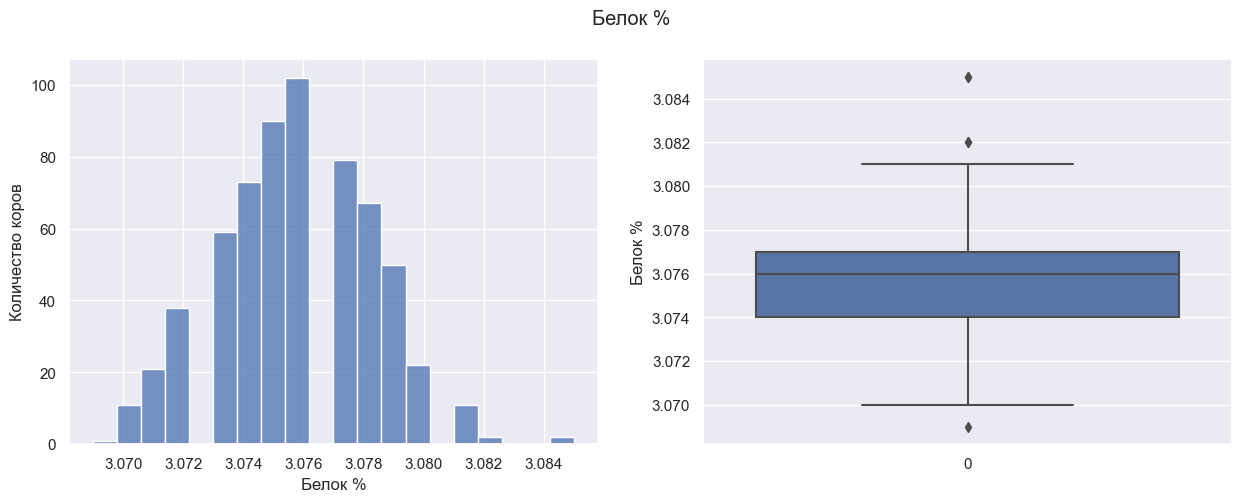

In [29]:
#Строим диаграмму Белок %
diagram(ferma_main, 'Белок %', 'Белок %')

**Не нормальное распредение** Похоже на Пуассона 

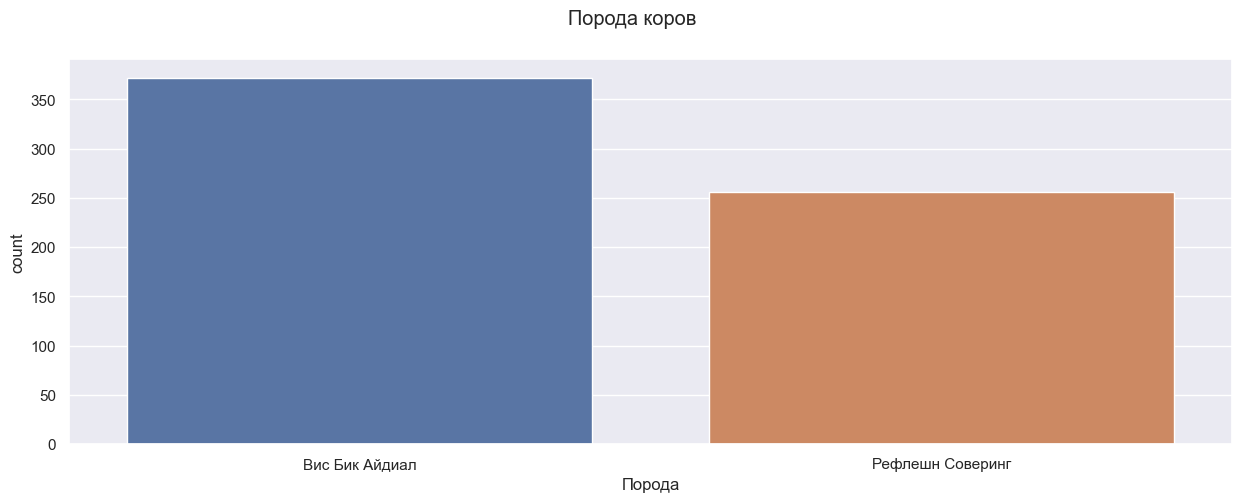

In [30]:
diagram_cat(ferma_main, 'Порода', 'Порода коров')

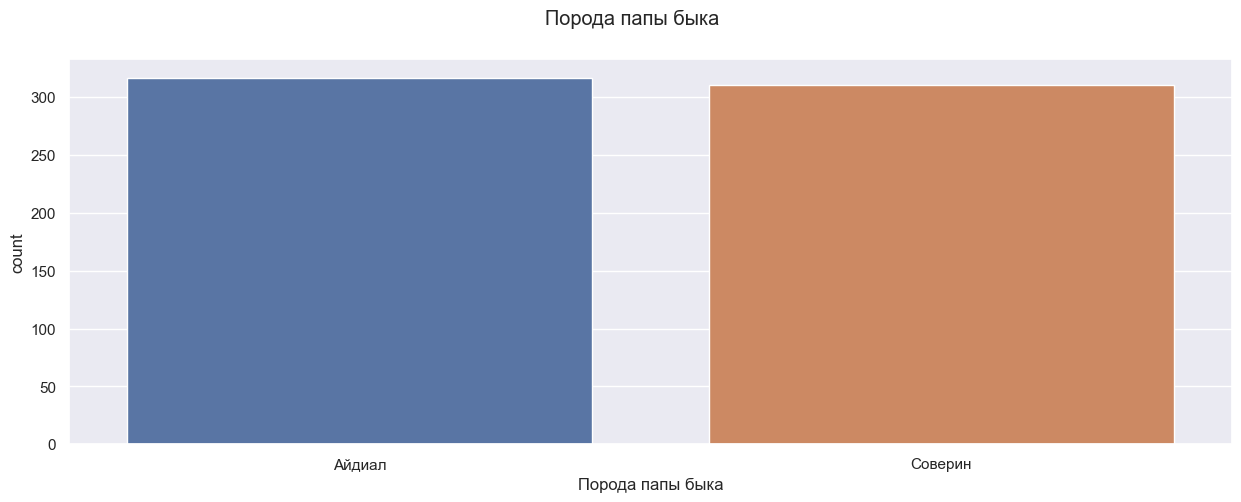

In [31]:
diagram_cat(ferma_main, 'Порода папы быка', 'Порода папы быка')

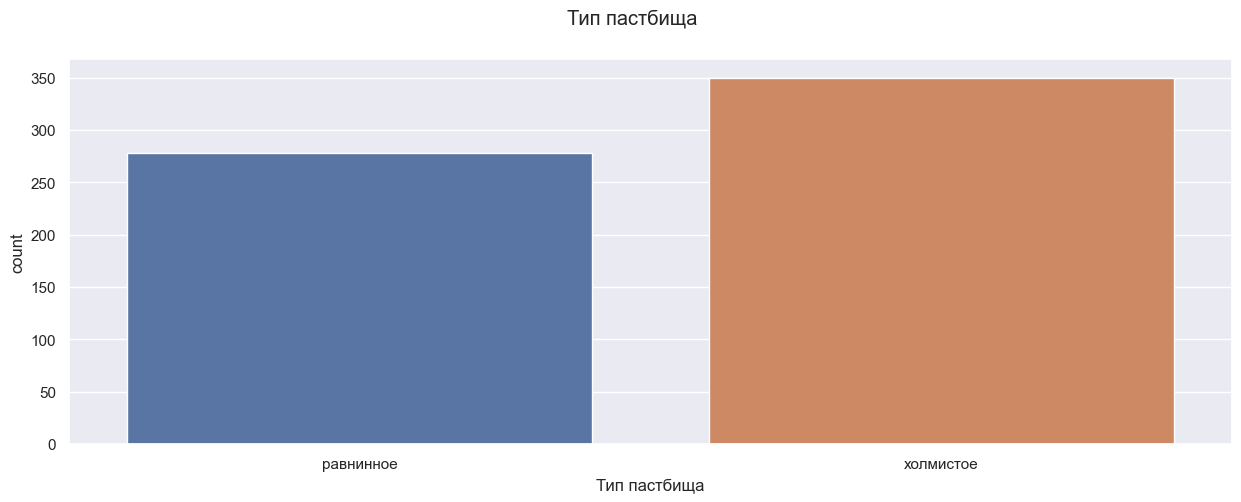

In [32]:
diagram_cat(ferma_main, 'Тип пастбища', 'Тип пастбища')

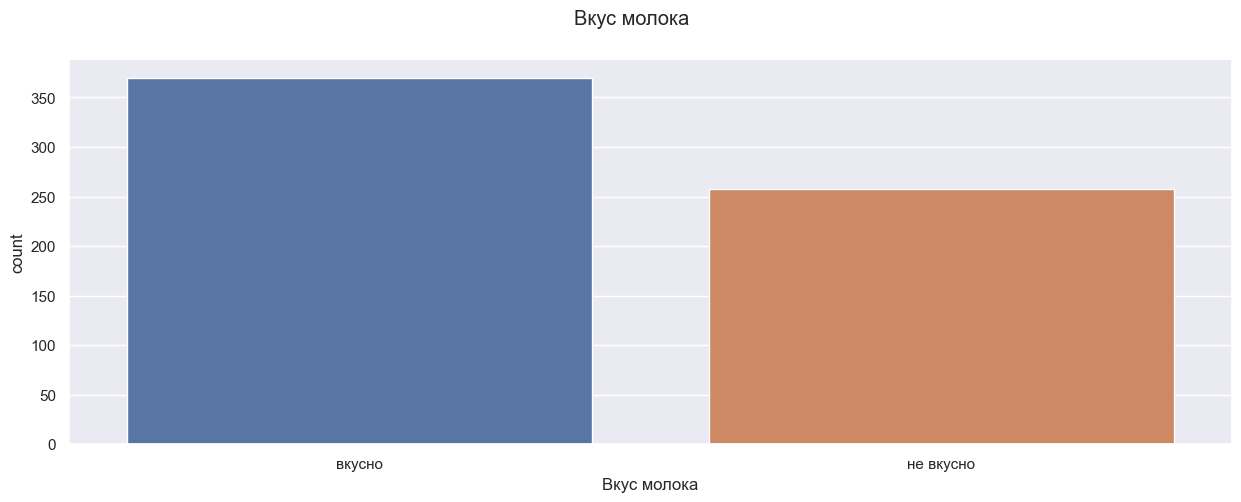

In [33]:
diagram_cat(ferma_main, 'Вкус молока', 'Вкус молока')

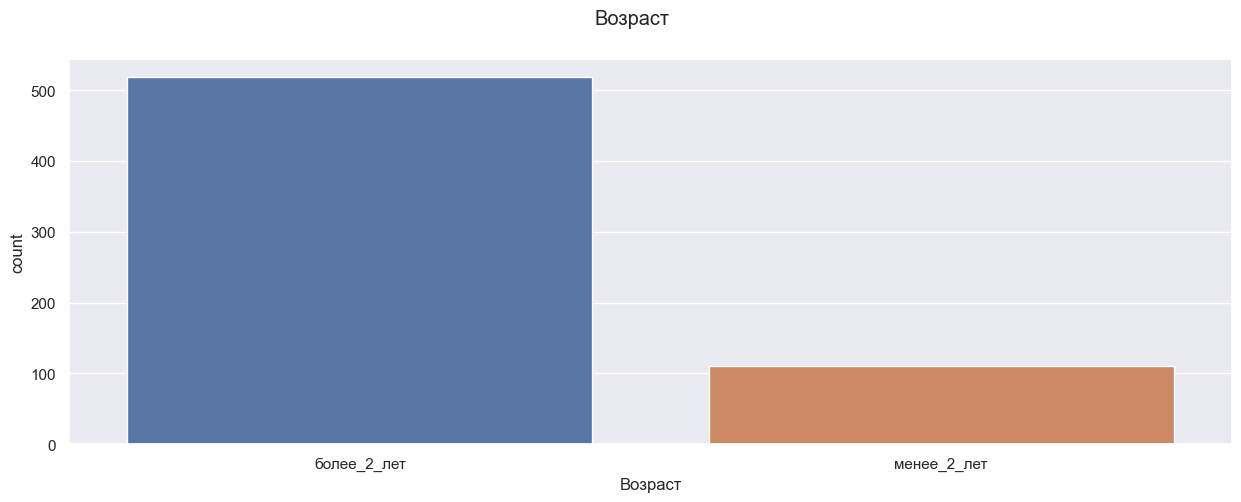

In [34]:
diagram_cat(ferma_main, 'Возраст', 'Возраст')

#### 3.2.2 Таблица ferma_dad

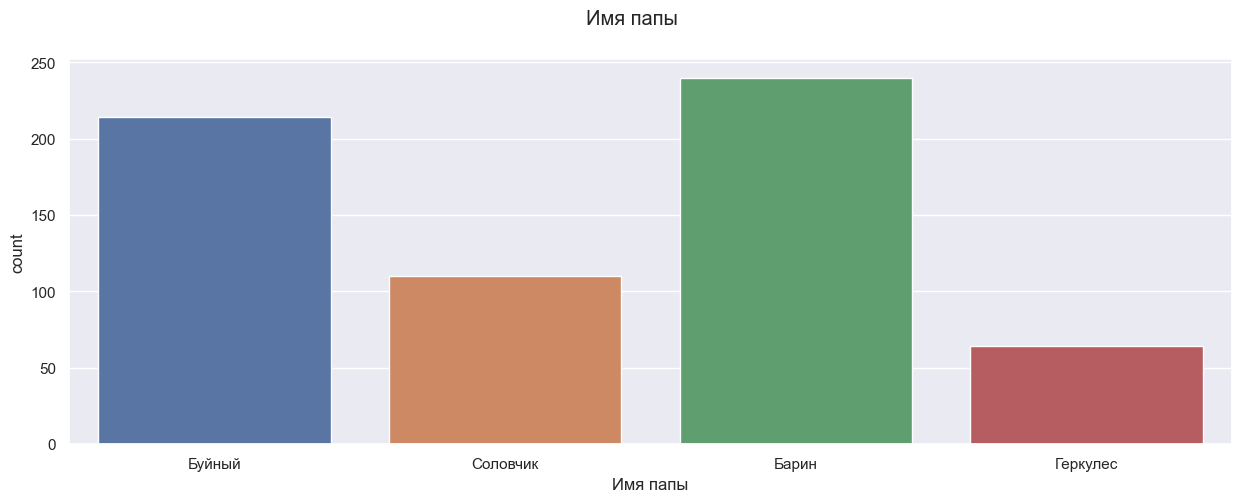

In [35]:
diagram_cat(ferma_dad, 'Имя папы', 'Имя папы')

#### 3.2.3 Таблица cow_buy

In [36]:
#проверяем колонки 
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы', 'Жирность %',
       'Белок %', 'Возраст'],
      dtype='object')

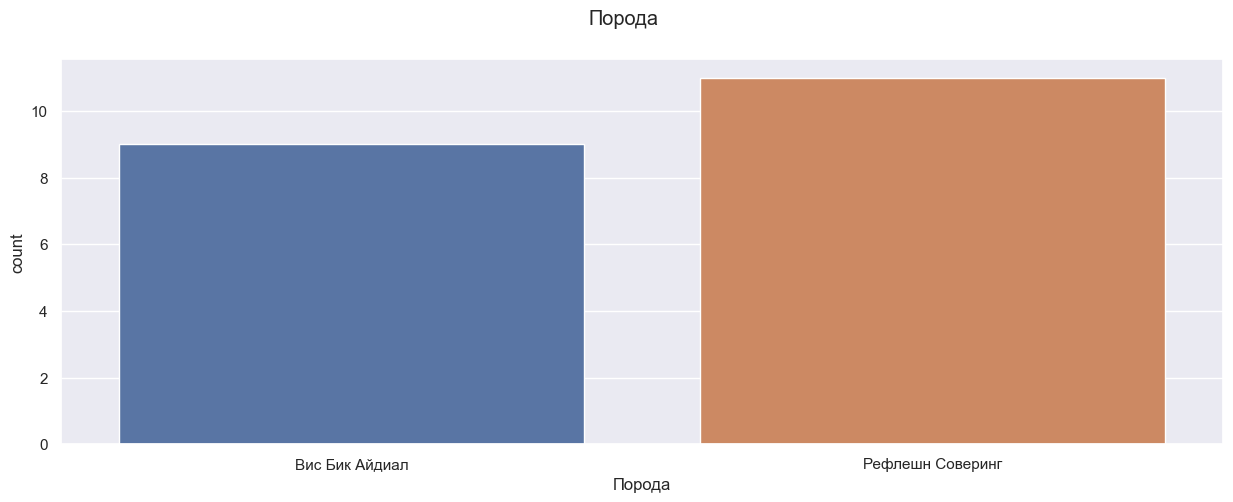

In [37]:
diagram_cat(cow_buy, 'Порода', 'Порода')

Предложений коров Породой Рефлешн Соверинг больше. Но порода Вис Бик Айдиал у заказчика предпочтительнее (больше)

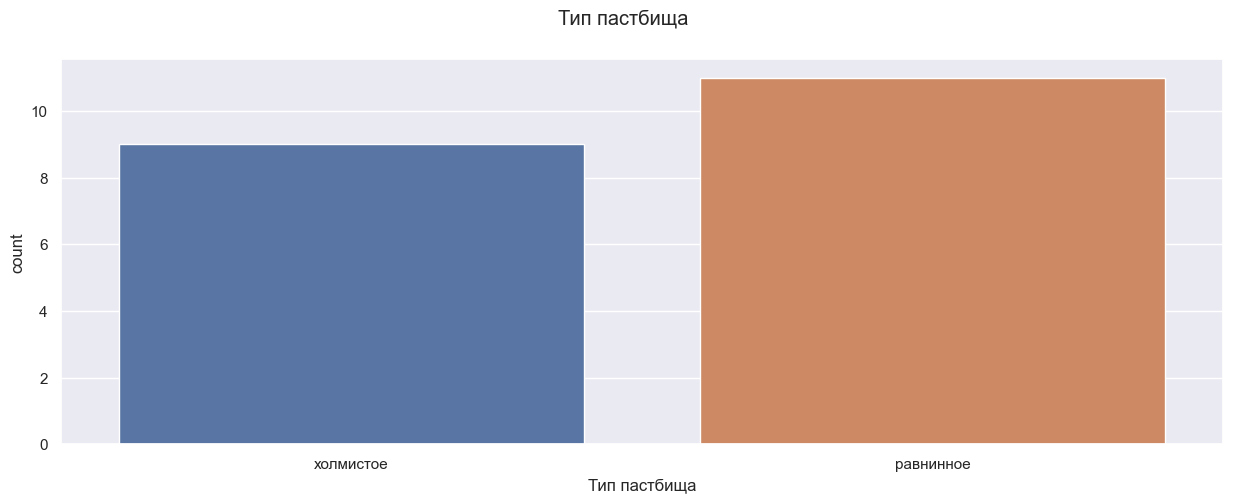

In [38]:
diagram_cat(cow_buy, 'Тип пастбища', 'Тип пастбища')

Так же всё наоборот с данными заказчика. 

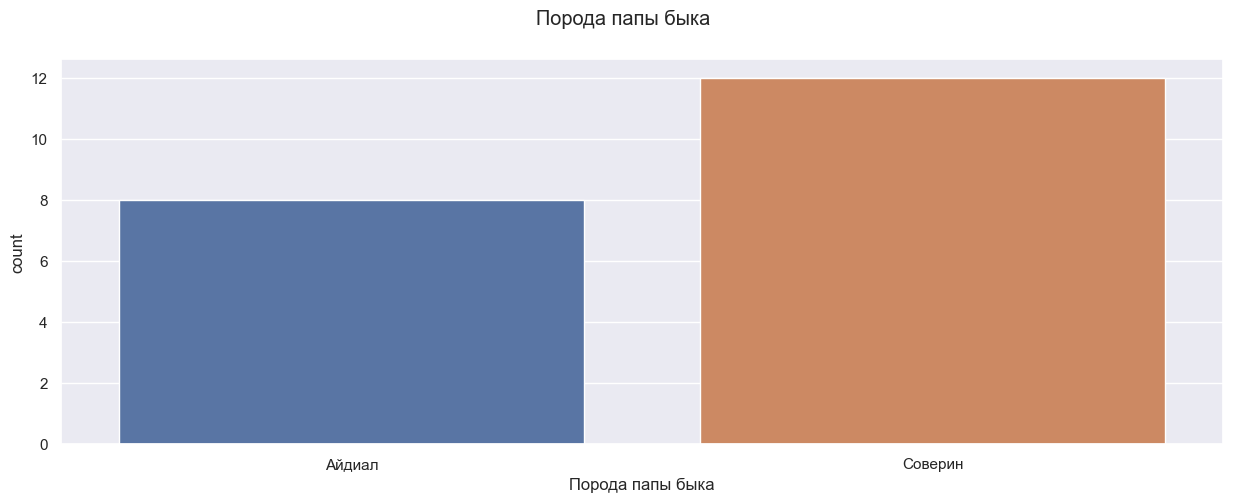

In [39]:
diagram_cat(cow_buy, 'Порода папы быка', 'Порода папы быка')

У заказчика количество коров породой Айдиал и породой Соверин почти равны. 

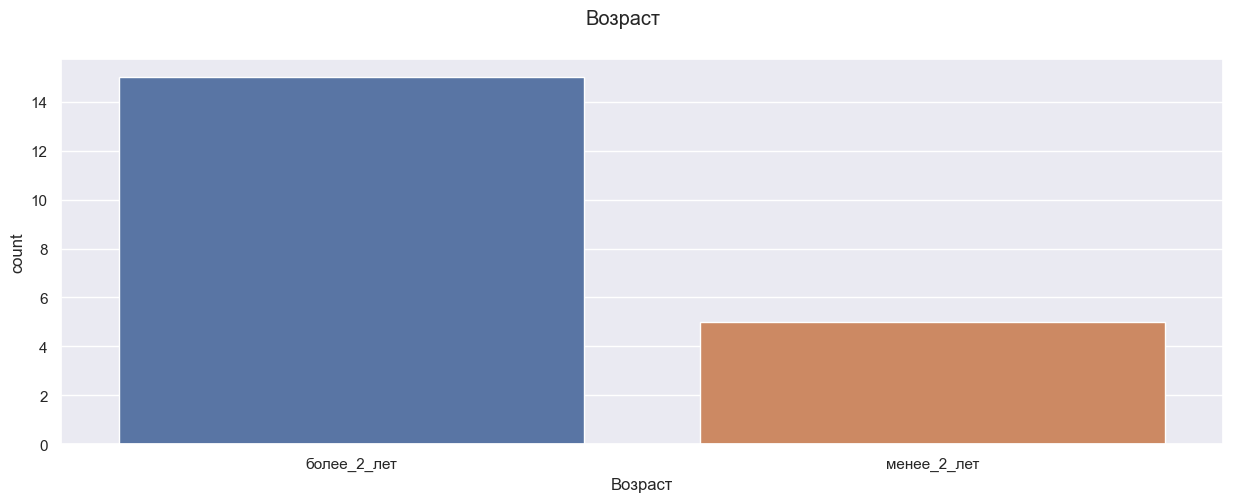

In [40]:
diagram_cat(cow_buy, 'Возраст', 'Возраст')

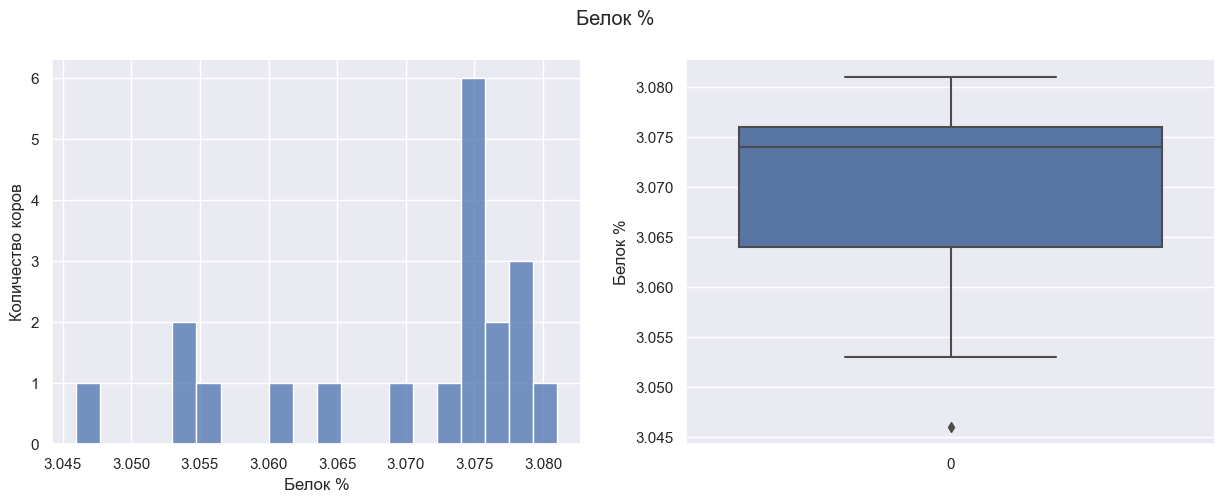

In [41]:
diagram(cow_buy, 'Белок %', 'Белок %')

**Не нормальное распределение**

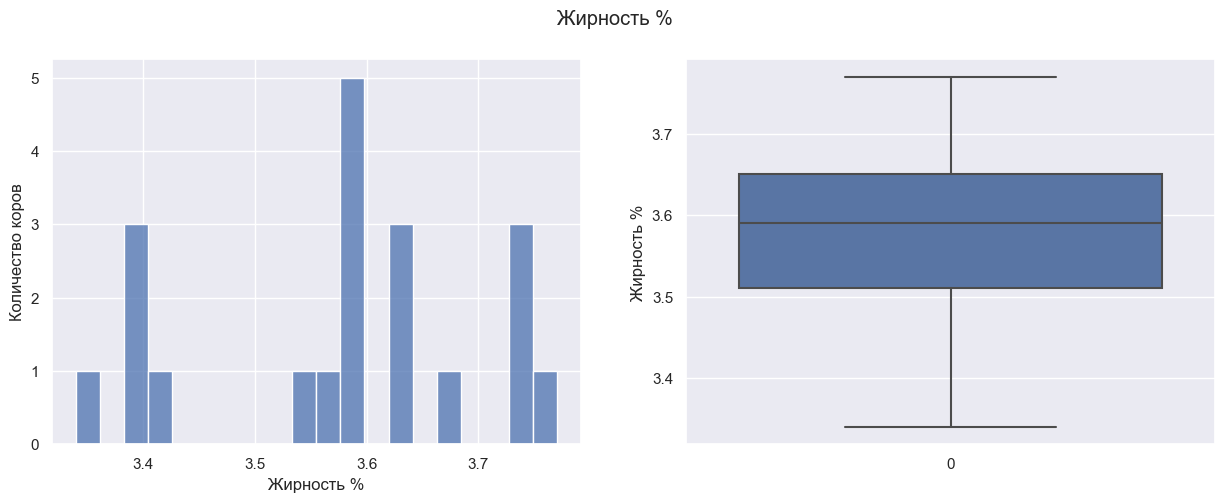

In [42]:
diagram(cow_buy, 'Жирность %', 'Жирность %')

**Не нормальное распределение** 

### 3.3. Вывод

1. При рассмотрении Признака **Удой кг** выявленено максимальное значение 45616 кг. у Коровы  с **ID 17**. Данный выброс был удален с двух таблиц ferma_main и ferma_dad.
2. **Средний удой** коровы у фермера **6 125 кг., медиана - 6 132 кг.** Будем рассматривать > 6000.
3. У заказчика количество коров породой **Айдиал и породой Соверин почти равны**. 
4. У заказчика больше коров старше 2 лет.
5. У заказчика больше вкусного молока, чем нет.
6. Предложений коров Породой Рефлешн Соверинг большеб чем  Вис Бик Айдиал.
7. Нормальное распределение наблюдаем в признаках: **ЭКЕ (Энергетическая кормовая единица) и Удой кг.**

In [43]:
table = pd.pivot_table(ferma_main, values=['Удой  кг', 'Жирность %', 'Белок %'], index=['Тип пастбища','Порода', 'Вкус молока', 'Возраст'],
                       aggfunc={'Удой  кг': "mean", 'Жирность %': "mean",'Белок %': "mean" })
display(table.head(20))

Белок %  Жирность %  \
Тип пастбища Порода           Вкус молока Возраст                             
равнинное    Вис Бик Айдиал   вкусно      более_2_лет  3.076325    3.677662   
                                          менее_2_лет  3.076923    3.452308   
                              не вкусно   более_2_лет  3.075656    3.613125   
                                          менее_2_лет  3.075303    3.427576   
             Рефлешн Соверинг вкусно      более_2_лет  3.073927    3.679268   
                                          менее_2_лет  3.075400    3.418000   
                              не вкусно   более_2_лет  3.074278    3.690278   
                                          менее_2_лет  3.073556    3.327778   
холмистое    Вис Бик Айдиал   вкусно      более_2_лет  3.076664    3.624579   
                                          менее_2_лет  3.076476    3.409524   
                              не вкусно   более_2_лет  3.076558    3.631538   
                                          менее_2_лет  3.076000    3.476000   
             Рефлешн Соверинг вкусно      более_2_лет  3.075606    3.634468   
                                          менее_2_лет  3.074833    3.450000   
                              не вкусно   более_2_лет  3.074277    3.635532   
                                          менее_2_лет  3.075583    3.397500   

                                                          Удой  кг  
Тип пастбища Порода           Вкус молока Возраст                   
равнинное    Вис Бик Айдиал   вкусно      более_2_лет  6225.974026  
                                          менее_2_лет  5450.230769  
                              не вкусно   более_2_лет  6180.968750  
                                          менее_2_лет  5497.606061  
             Рефлешн Соверинг вкусно      более_2_лет  6227.292683  
                                          менее_2_лет  5503.000000  
                              не вкусно   более_2_лет  6266.472222  
                                          менее_2_лет  5329.444444  
холмистое    Вис Бик Айдиал   вкусно      более_2_лет  6300.962617  
                                          менее_2_лет  5470.000000  
                              не вкусно   более_2_лет  6262.403846  
                                          менее_2_лет  5401.000000  
             Рефлешн Соверинг вкусно      более_2_лет  6341.531915  
                                          менее_2_лет  5410.083333  
                              не вкусно   более_2_лет  6306.276596  
                                          менее_2_лет  5359.750000

## 4. Корреляционный анализ таблицы ferma_main

### 4.1 Коэффициенты корреляции между признаками 

In [44]:
!pip install phik -q

* Корреляция Пирсона для линейных зависимостей, корреляция Спирмена в противном случае
* Корреляция Спирмена для данных с ранжированием, корреляция Пирсона в противном случае

In [45]:
import phik
from phik import resources, report

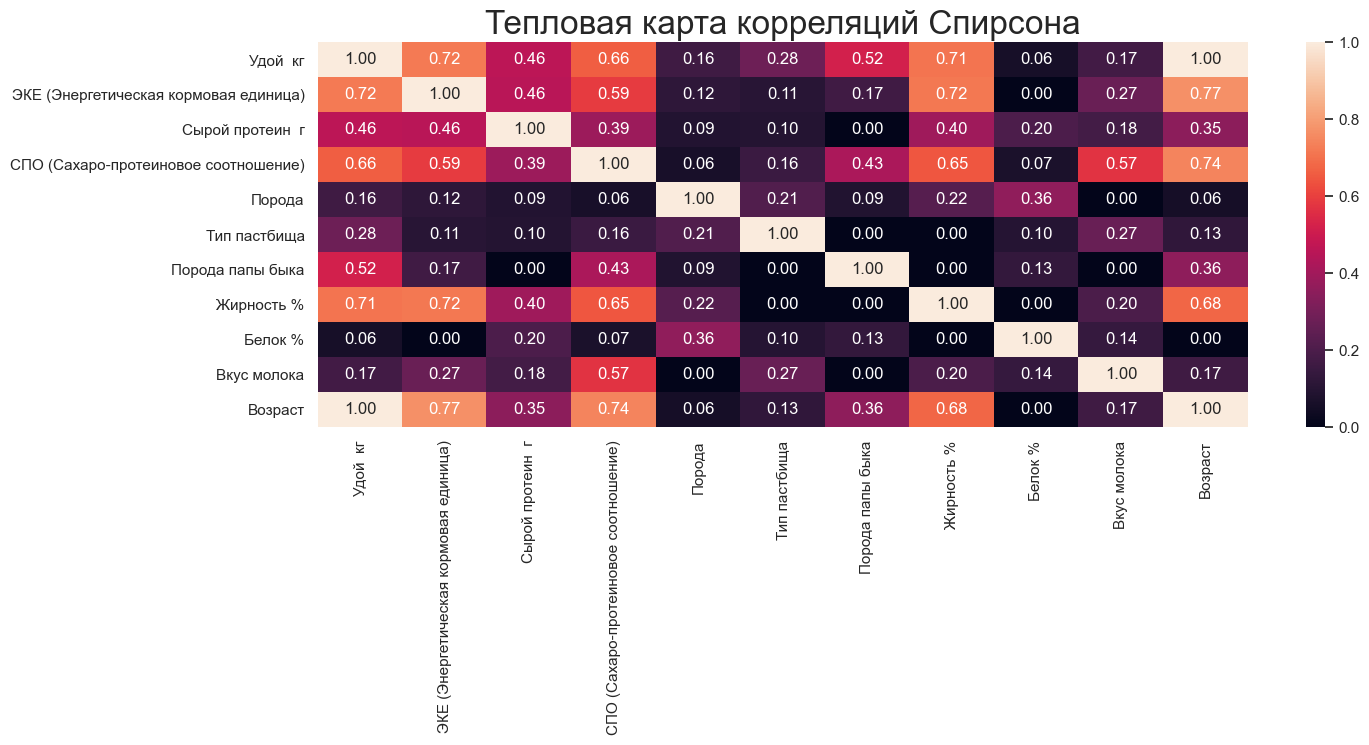

In [46]:
num_col = ['Удой  кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин  г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность %', 'Белок %']
ferma = ferma_main.drop(['id'], axis =1)
sns.heatmap(ferma.phik_matrix(interval_cols=num_col), annot = True, fmt = '.2f')
plt.title('Тепловая карта корреляций Cпирсона', fontsize=24)
plt.show()

Светлые тона говорят о слабой линейной зависимости,  а тёмные — о слабой. Однако между двумя переменными существует положительная монотонная зависимость. Судя по тепловой карте, самая сильная не прямая связь с целевым признаком **Удой кг** у входных признаков **Возраст** и **ЭКЕ** ,а ещё связь заметна между другими признаками.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22904\702155094.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = '.2f')


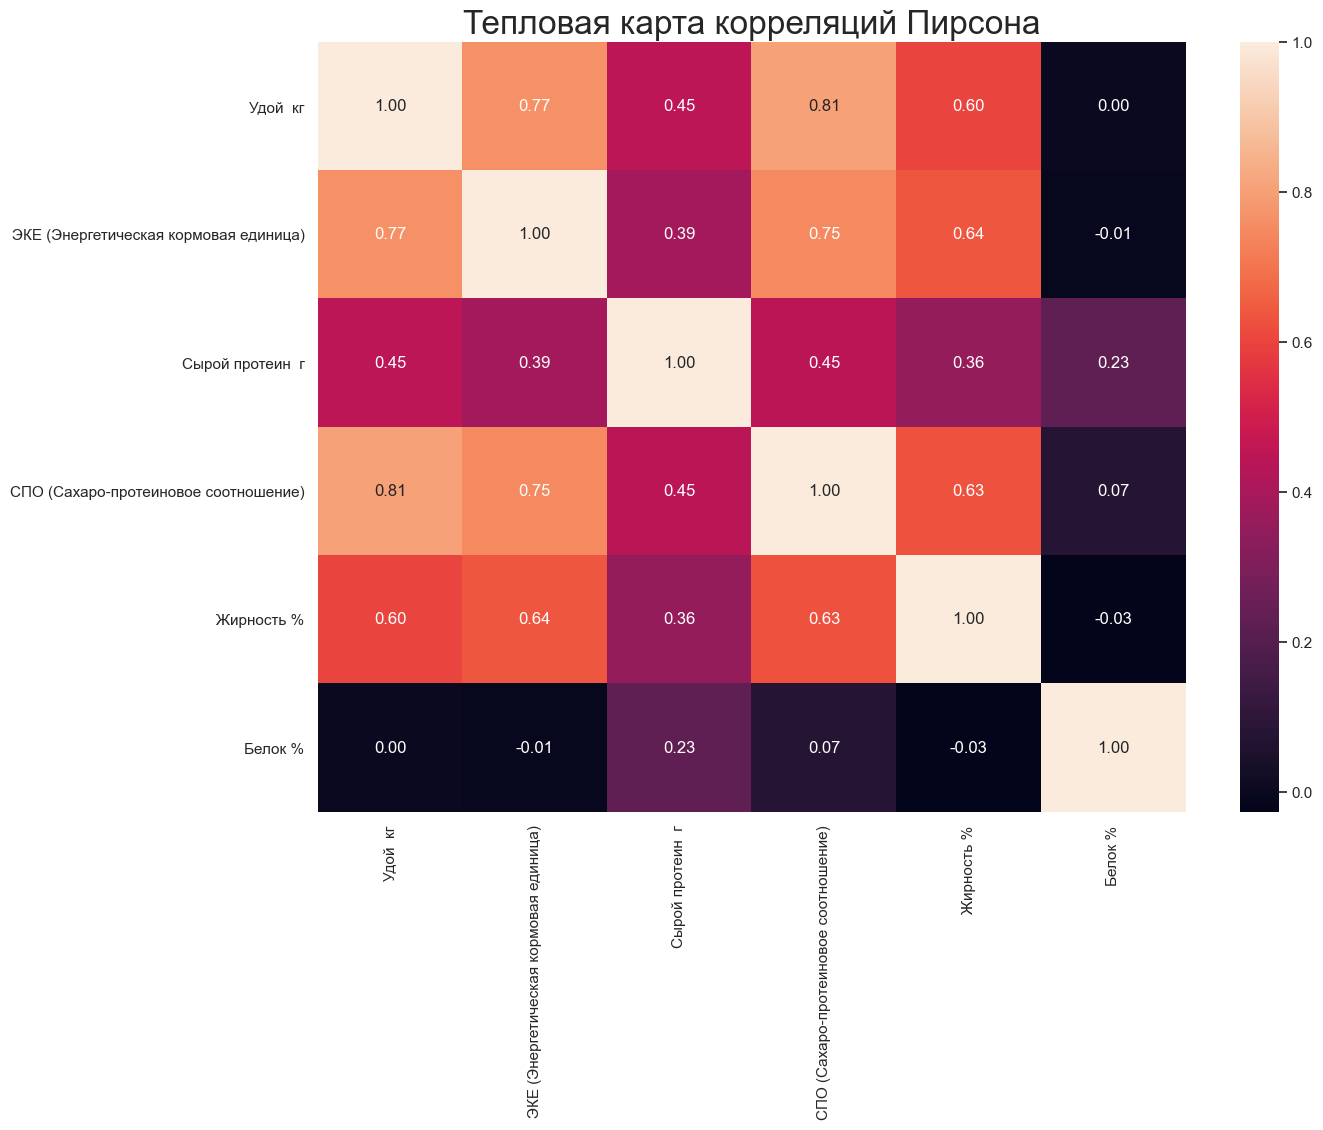

In [47]:
#построю тепловую карту корреляции
data = ferma_main.drop(['id'], axis =1)
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.title('Тепловая карта корреляций Пирсона', fontsize=24)
plt.show()

Светлые тона говорят о сильной линейной зависимости, а тёмные — о слабой. Судя по тепловой карте, самая сильная прямая связь с целевым признаком **Удой кг** у входных признаков **СПО** и **ЭКЕ** ,а ещё связь заметна между другими признаками.

### 4.2 Диаграммы рассеивания для признака Удой, кг 

In [48]:
#функция для диаграмм рассеянивания 
def dia_corr (data, column):
    sns.scatterplot(data=data, x="Удой  кг", y= column, hue='Вкус молока',
    sizes=(20, 200), legend="full")
ferma_main.columns

Index(['id', 'Удой  кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин  г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность %', 'Белок %',
       'Вкус молока', 'Возраст'],
      dtype='object')

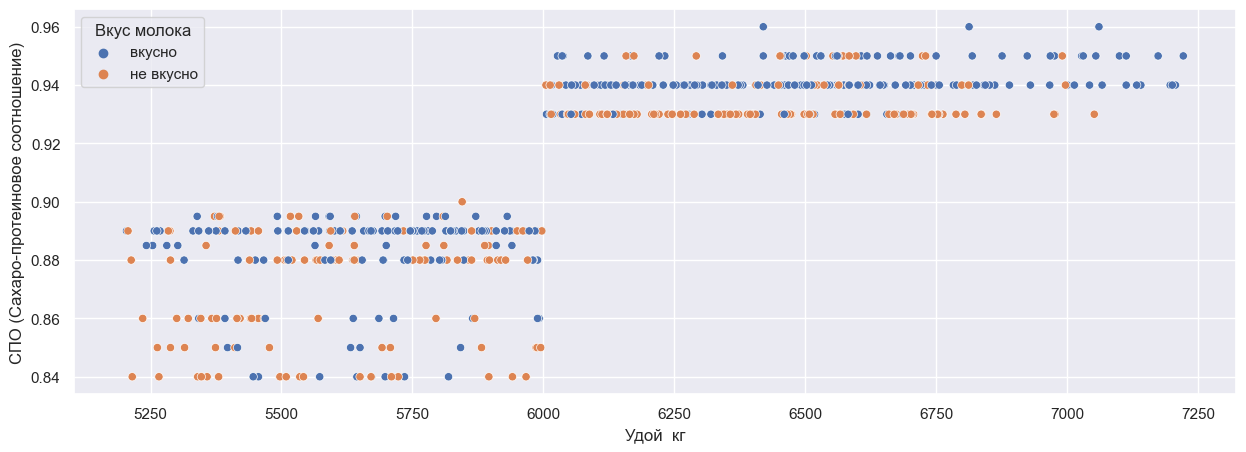

In [49]:
dia_corr(ferma_main, 'СПО (Сахаро-протеиновое соотношение)')

Тут сразу видно, что Удой делить на до 6000 и после 6000. Видна зависимость,что при **СПО < 0.92 Удой кг < 6000 кг**. 

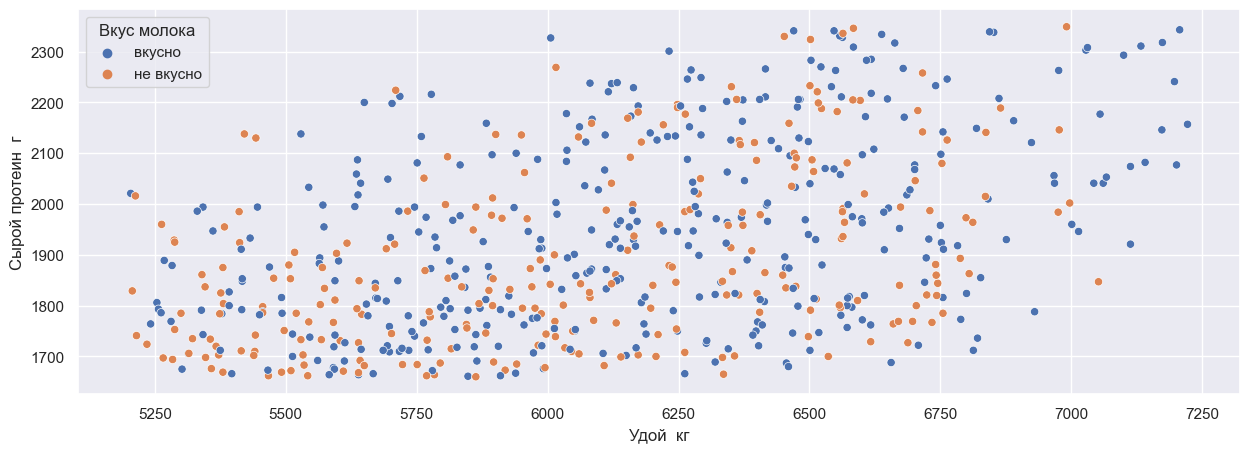

In [50]:
dia_corr(ferma_main, 'Сырой протеин  г')

На диаграмме  линейная зависимость.

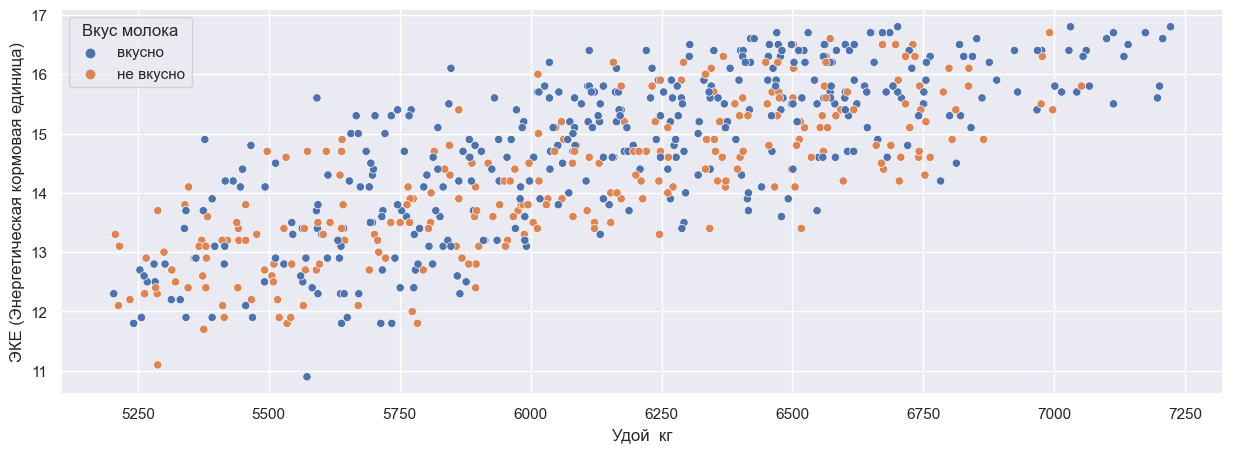

In [51]:
dia_corr(ferma_main, 'ЭКЕ (Энергетическая кормовая единица)')

Высокая  Корреляция в 0.77 по таблице. На графике указана ветвь параболы - графика квадратичной функции.

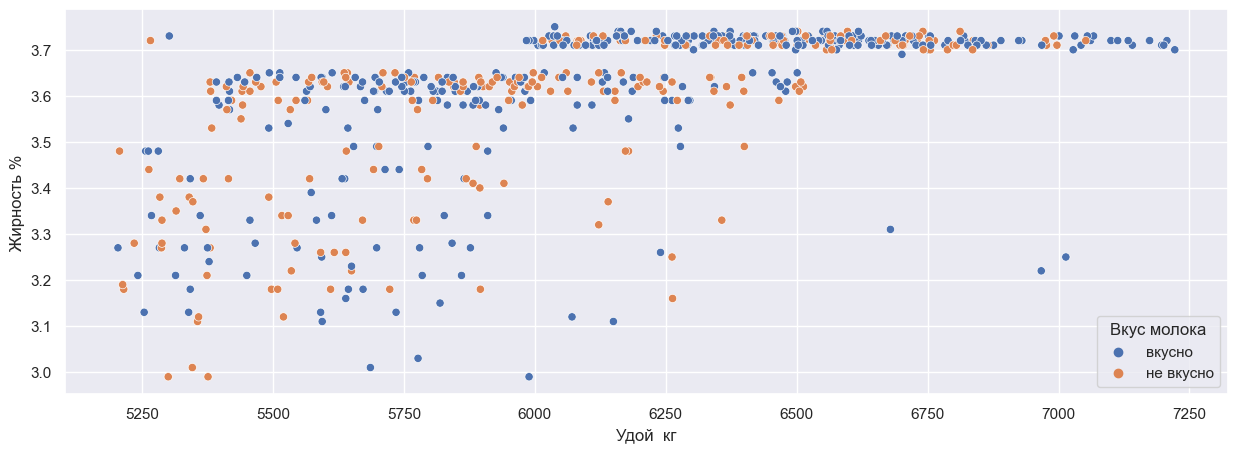

In [52]:
dia_corr(ferma_main, 'Жирность %')

Удой больше 6500 дают те коровы, у которых Жирность % ~3.7. И те коровы **Жирность в % ~ 3.7 дают Удой кг стабильно от 6000 кг.** Корелляция заметная, но не Высокая.

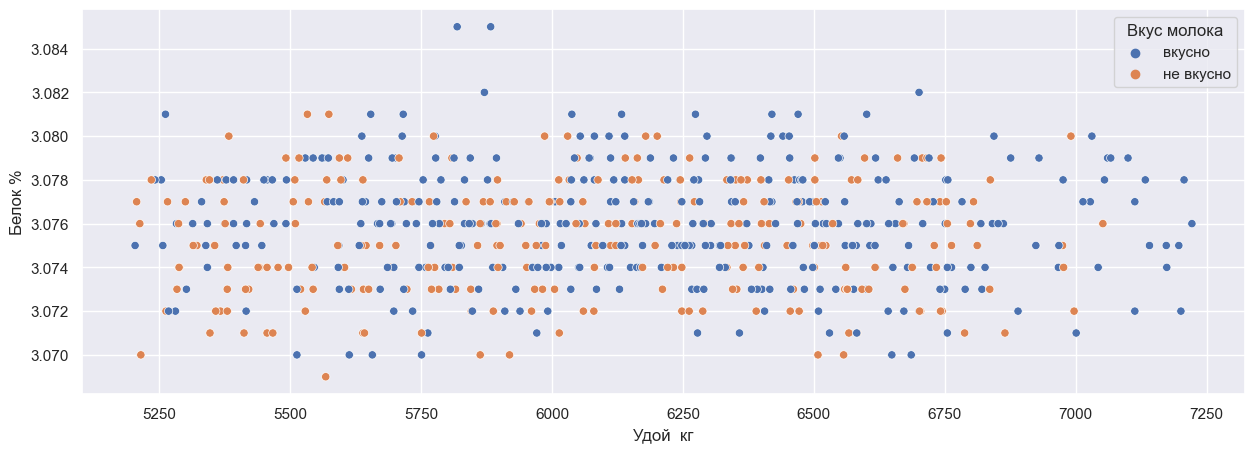

In [53]:
dia_corr(ferma_main, 'Белок %')

Зависимости не вижу.

### 4.3 Вывод

Судя по тепловой карте, самая сильная прямая связь с целевым признаком **Удой кг** у входных признаков **СПО** (0.81) и **ЭКЕ** (0.77) ,а ещё связь заметна между другими признаками.

При **СПО < 0.92 Удой кг < 6000 кг**. 

Удой больше 6500 дают те коровы, у которых Жирность % ~3.7. И те коровы **Жирность в % ~ 3.7 дают Удой кг стабильно от 6000 кг.** Корелляция заметная, но не Высокая.

1. Линейная зависимость между признаками Удой кг и Сырой протеин, ЭКЕ
2. СПО  - категориальный признак 
3. мультиколлинеарность не наблюдается 

##  5. Обучение модели линейной регрессии

### 5.1 Первая задача линейной регрессии 
 * целевой признак  - **Удой кг**
 * признак **Сырой протеин** линейно зависим с признаком **Удой кг**. При повышении сырово протеина, увеличивается удой коровы.

In [63]:
#функция по разбивке данных на выборки, кодирования, маштабирования 
def learn (data, y, cat_col_names, num_col_names ):
    # создание константы RANDOM_STATE
    RANDOM_STATE = 42
    # выделяем в отдельные переменные целевой признак и входные признаки
    X = data.drop(y, axis=1)
    y = data[y]

    # разделяем данные на тренировочные и тестовые, зафиксируем random_state
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)
    
    # выбераем класс OneHotEncoder() для кодирования 
    # задаём параметру sparse значение False
    encoder = OneHotEncoder(sparse_output= False, drop = 'first' )

    # обучаем и преобразуем категориальные признаки из тренировочной выборки 
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
    X_test_ohe = encoder.transform(X_test[cat_col_names]) 

    # сохраняем в переменной encoder_col_names названия новых столбцов 
    encoder_col_names = encoder.get_feature_names_out()
    
    # выбераем класс StandardScaler() для маштабирования 
    scaler = StandardScaler()

    # масштабируйте тренировочную  и тестовую выборки
    X_train_scaler =  scaler.fit_transform(X_train[num_col_names])
    X_test_scaler = scaler.transform(X_test[num_col_names]) 

    # создаем ттаблицы закодированных данных
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # создаем ттаблицы маштабированных данных
    X_train_scaled = pd.DataFrame(X_train_scaler, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaler, columns=num_col_names)
    
    # объединяем таблицы
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    # инициализация и обучение модели
    model  = LinearRegression()
    model.fit(X_train, y_train)

    # предсказанные значения для X_test
    predictions = model.predict(X_test)
    
    return [X_train, X_test, y_train, y_test, predictions, encoder, scaler, model]

In [70]:
!pip install --upgrade scikit-learn


In [74]:
#функция для метрик
def metr (learn, data, y, cat_col_names, num_col_names):
    model_m = learn( data, y, cat_col_names, num_col_names)
    mse = mean_squared_error(model_m[3], model_m[4]) 
    rmse =  mean_squared_error(model_m[3], model_m[4])
    mae = mean_absolute_error(model_m[3], model_m[4]) 
    r2 = r2_score(model_m[3], model_m[4])
    # вывод полученных значений
    print(f"R2 LinearRegression = {r2:.3f}")
    print(f"MAE LinearRegression = {mae:.0f}")
    print(f"MSE LinearRegression = {mse:.3f}")
    print(f"RMSE LinearRegression = {rmse:.3f}")

**MSE** - Средняя квадратичная ошибка. Показывает, на какое значение в среднем предсказание отличается от истинного значения. Измеряется в квадратных единицах целевого признака, из-за этого её сложно интерпретировать.

**RMSE** - Квадратный корень из средней квадратичной ошибки. Показывает, на какое значение в среднем предсказание отличается от истинного значения. Измеряется в единицах целевого признака, поэтому его легче интерпретировать, чем MSE.

**MAE** - Средняя абсолютная ошибка. Показывает, на какое значение предсказание в среднем отличается от истинного значения. Измеряется в единицах целевого признака, поэтому её легче интерпретировать.

**R2** - Коэффициент детерминации. Показывает, в скольких процентах случаев предсказание модели точнее, чем среднее значение целевого признака. Для сравнения двух регрессионных моделей.

In [75]:
def quality_model(learn, data, y, cat_col_names, num_col_names):
    # анализ остатков
    model_a = learn(data, y, cat_col_names, num_col_names)
    residuals = model_a[3] - model_a[4]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(model_a[4], residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

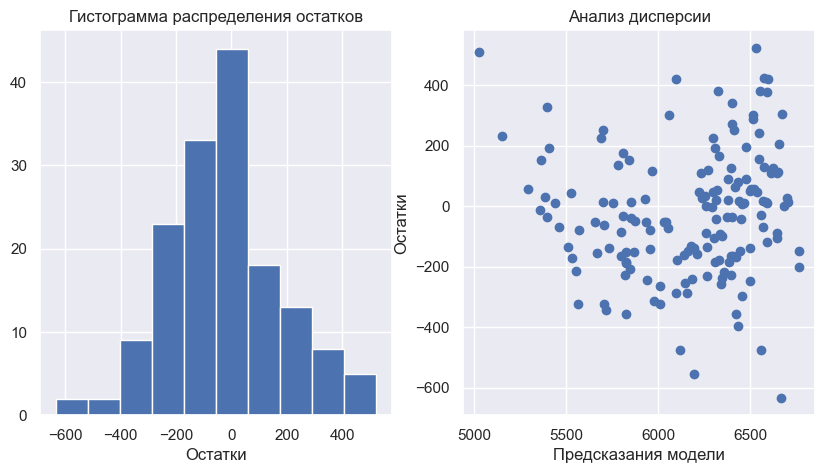

R2 LinearRegression = 0.784
MAE LinearRegression = 164
MSE LinearRegression = 43887.015
RMSE LinearRegression = 43887.015


In [76]:
#входные данные 
data = ferma_main
y = 'Удой  кг'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка', 'Возраст']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин  г', 'СПО (Сахаро-протеиновое соотношение)']


quality_model(learn, data, y, cat_col_names, num_col_names)
metr (learn, data, y, cat_col_names, num_col_names)

### Вывод:
1. Коэффициент детерминации R2  показывает, что в 78  процентах случаев предсказание модели точнее, чем среднее значение целевого признака.
2. График симметричен относительно нуля — хороший знак! Это значит, что среднее значение остатков модели равно 0. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Такая модель работает качественно.
3. на одном участке разброс значений остатков сильно больше, чем на другом, то на диаграмме рассеяния начинает виднеться «рупор»

### 5.2 Вторая  задача линейной регрессии 
 * целевой признак  - **Удой кг**
 * признак **Сырой протеин** линейно зависим с признаком **Удой кг**. При повышении сырово протеина, увеличивается удой коровы.
 * **СПО** и Удой не связаны линейно (преобразовать в бинарный с границей в 6000 кг. Удой и 0,92 СПО
 * ВВести новый признак **ЭКЕ в квадрате**

In [77]:
ferma_main['ЭКЭ'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)']**2 
data_main = ferma_main[:]

# замена СПО на бинарный тип
data_main['СПО (Сахаро-протеиновое соотношение)'] = data_main['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 'более_0.92' if x > 0.9 else 'менее_0.92')

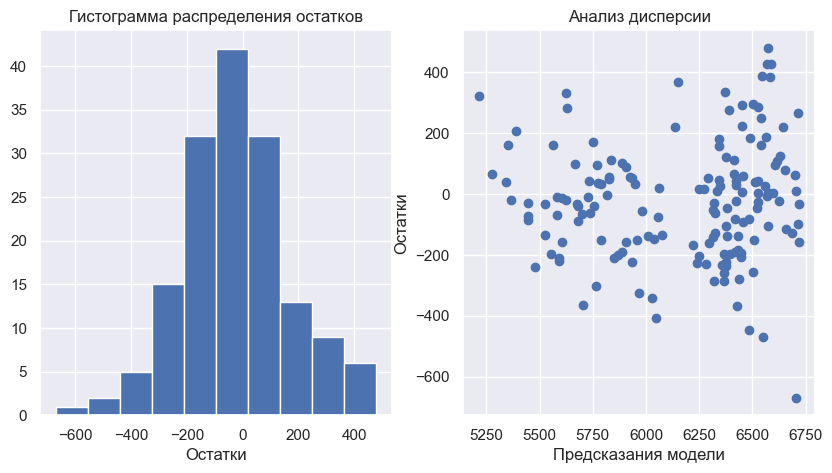

R2 LinearRegression = 0.817
MAE LinearRegression = 149
MSE LinearRegression = 37235.065
RMSE LinearRegression = 37235.065


In [78]:
#входные данные 
data = data_main
y = 'Удой  кг'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин  г']


quality_model(learn, data, y, cat_col_names, num_col_names)
metr (learn, data, y, cat_col_names, num_col_names)

### Вывод:
1. Коэффициент детерминации R2  показывает, что в 81  проценте случаев предсказание модели точнее, чем среднее значение целевого признака.
2. Нормальное распределение остатков само по себе не означает, что с моделью всё отлично. Так, если среднее значение смещено влево от нуля и равно −50, то модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений.
3. Остатки на диаграмме показывают, что модель может работать неустойчиво, поскольку разброс остатков непостоянен. Такую модель использовать в работе нельзя.

### 5.3  Третья   задача линейной регрессии 
 * целевой признак  - **Удой кг**
 * признак **Сырой протеин** линейно зависим с признаком **Удой кг**. При повышении сырово протеина, увеличивается удой коровы.
 * **СПО** и Удой не связаны линейно (преобразовать в бинарный с границей в 6000 кг. Удой и 0,92 СПО
 * ВВести новый признак **ЭКЕ в квадрате**
 * Добавить признак **Имя Папы**
 * Устранить нелинейность между признаками 

In [79]:
# добавление столбца с именами пап коров
data_main = data_main.merge(ferma_dad, on='id')
data_main['ЭКЕ'] = data_main['ЭКЕ (Энергетическая кормовая единица)']**2

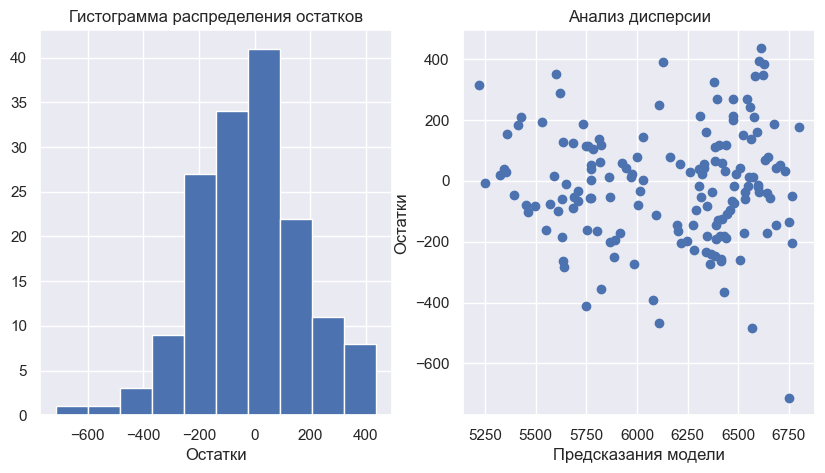

R2 LinearRegression = 0.825
MAE LinearRegression = 146
MSE LinearRegression = 35673.890
RMSE LinearRegression = 35673.890


In [80]:
#входные данные 
data = data_main
y = 'Удой  кг'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка', 'Возраст', 'СПО (Сахаро-протеиновое соотношение)', 'Имя папы']
num_col_names = ['ЭКЕ','Сырой протеин  г']


quality_model(learn, data, y, cat_col_names, num_col_names)
metr (learn, data, y, cat_col_names, num_col_names)

### Вывод:
1. Коэффициент детерминации R2  показывает, что в 82  процентах случаев предсказание модели точнее, чем среднее значение целевого признака.
2. График симметричен относительно нуля — хороший знак! Это значит, что среднее значение остатков модели равно 0. Получается, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения. Модель даёт как завышенные, так и заниженные предсказания, которые «уравновешивают» друг друга. Такая модель работает качественно.
3. Остатки на диаграмме показывают, что модель может работать устойчиво, поскольку разброс остатков равномерен. 

### 5.4 Сравнение моделей 

**R2:**
* R2 (Первой модели) - 78 %
* R2 (Второй модели) - 81 %
* R2 (Третьей модели) - 82 %

**Остатки:**
* Первая модель: 
Нормальное распределение без смещения. 
* Вторая модель :
Нормальное распредление со смещением слево. (-50)
* Третья модель :
Нормальное распределение без смещения.

**Метрики качества**:
* Первая модель:
MAE LinearRegression = 164,
MSE LinearRegression = 43887.015, 
RMSE LinearRegression = 209.492

* Вторая модель:
MAE LinearRegression = 149
MSE LinearRegression = 37235.065
RMSE LinearRegression = 192.964

* Третья модель:
MAE LinearRegression = 147
MSE LinearRegression = 35969.441
RMSE LinearRegression = 189.656

### Вывод: 

Третья модель лидирует по всем показателям. 
1. Имеет наименьший коэффициент детерминации, то есть в 82 % модель предсказывает верно. 
2. Согласно остаточным ошибкам расспределено нормально без смещения, значит предсказания не сильно разняться с тестовыми значениями. 
3. Если анализировать по метрикам: наименьшие значения в среднем предсказания отличающего  от истинного значения у третьей модели.

In [81]:
#Доверительный интервал 
import scipy.stats as st 
model_a = learn (data, y, cat_col_names, num_col_names)
interval = st.norm.interval(confidence=0.90, 
                 loc=np.mean(model_a[4]), 
                 scale=st.sem(model_a[4])) 
print('Доверительный интервал : ', interval[0] ,'-', interval[1] )

Доверительный интервал :  6102.712782568752 - 6211.002363343916


### 5.5 Спрогназировать удой коров 
* Добавить недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение)
* Взять из датасета ferma_main.csv средние значения каждого из признаков и увеличить их на 5%.

In [82]:
#добавляем столбцы 
cow_buy['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05 
cow_buy['ЭКЕ'] = cow_buy['ЭКЕ (Энергетическая кормовая единица)'] **2
cow_buy['СПО (Сахаро-протеиновое соотношение)'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].mean()*1.05
cow_buy['Сырой протеин  г'] = ferma_main['Сырой протеин  г'].mean()*1.05

# замена  на бинарный тип
cow_buy['СПО (Сахаро-протеиновое соотношение)'] = cow_buy['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 'более_0.92' if x > 0.92 else 'менее_0.92')
display(cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ,СПО (Сахаро-протеиновое соотношение),Сырой протеин г
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532


In [84]:
data = data_main
y = 'Удой  кг'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка','СПО (Сахаро-протеиновое соотношение)', 'Возраст','Имя папы']
num_col_names = ['ЭКЕ','Сырой протеин  г']
    
    
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X = data.drop(y, axis=1)
y = data[y]

# разделяем данные на тренировочные и тестовые, зафиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)
X_cow = cow_buy
    
# выбераем класс OneHotEncoder() для кодирования 
# задаём параметру sparse значение False
encoder = OneHotEncoder(sparse_output=False,  drop='first')

# обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
X_cow_ohe = encoder.transform(X_cow[cat_col_names])

# сохраняем в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()
    
# выбераем класс StandardScaler() для маштабирования 
scaler = StandardScaler()

# масштабируйте тренировочную  и тестовую выборки
X_train_scaler =  scaler.fit_transform(X_train[num_col_names])
X_test_scaler = scaler.transform(X_test[num_col_names]) 
X_cow_scaler = scaler.transform(X_cow[num_col_names])

# создаем ттаблицы закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaler, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaler, columns=num_col_names)


X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_scaled = pd.DataFrame(X_cow_scaler, columns=num_col_names)
# объединяем таблицы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)
    
# инициализация и обучение модели
model  = LinearRegression()
model.fit(X_train, y_train)

# предсказанные значения для X_test
predictions = model.predict(X_cow)

for i in range(len(cow_buy)):
    cow_buy.loc[i,'Удой кг'] = predictions[i]

In [85]:
data_cow = cow_buy[cow_buy['Удой кг'] > 6000][:]
display(data_cow)

,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЕ,СПО (Сахаро-протеиновое соотношение),Сырой протеин г,Удой кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6378.711028
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6283.999775
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6593.089377
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6542.146066
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6609.919297
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6571.259737
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6283.999775
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6400.540668


### Вывод:
Все коровы, которые есть на продаже (согласно модели) дают молока более 6000 кг в год. 

## 6. Обучение модели логистической регрессии

### 6.1 Подготовить данные датасета ferma_main.csv и обучить на них модель LogisticRegression.
* В качестве целевого признак Вкус молока.
* При необходимости преобразуем имеющиеся или добавим новые признаки.

In [86]:
ferma_main.info()
ferma_main.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     628 non-null    int64  
 1   Удой  кг                               628 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  628 non-null    float64
 3   Сырой протеин  г                       628 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   628 non-null    float64
 5   Порода                                 628 non-null    object 
 6   Тип пастбища                           628 non-null    object 
 7   Порода папы быка                       628 non-null    object 
 8   Жирность %                             628 non-null    float64
 9   Белок %                                628 non-null    float64
 10  Вкус молока                            628 non-null    object 
 11  Возрас

,id,Удой кг,ЭКЕ (Энергетическая кормовая единица),Сырой протеин г,СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы быка,Жирность %,Белок %,Вкус молока,Возраст,ЭКЭ
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


In [87]:
ferma_main['Вкус молока'] = ferma_main['Вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
#ferma_main['Возраст'] = ferma_main['Возраст'].apply(lambda x: 1 if x == 'более_2_лет' else 0)
ferma_main['СПО (Сахаро-протеиновое соотношение)'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 'более_0.92' if x > 0.92 else 'менее_0.92')

In [88]:
from sklearn.preprocessing import LabelEncoder 

In [90]:
#подготовка данных и разработка модели
data = ferma_main
y = 'Вкус молока'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка','СПО (Сахаро-протеиновое соотношение)', 'Возраст']
num_col_names = ['ЭКЭ','Сырой протеин  г', 'Жирность %', 'Белок %']
    
    
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X = data.drop(y, axis=1)
y = data[y]

# разделяем данные на тренировочные и тестовые, зафиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# создайте экземпляр класса LabelEncoder для кодирования целевого признака
#label_encoder = LabelEncoder()

# обучите модель и трансформируйте тренировочную выборку 
#y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
#y_test = label_encoder.transform(y_test)

    
# выбераем класс OneHotEncoder() для кодирования 
# задаём параметру sparse значение False
encoder = OneHotEncoder(sparse_output=False,  drop='first')

# обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
#y_train = encoder.transform(y_train)
#y_test = encoder.transform(y_train)
# сохраняем в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()
# выбераем класс StandardScaler() для маштабирования 
scaler = StandardScaler()

# масштабируйте тренировочную  и тестовую выборки
X_train_scaler =  scaler.fit_transform(X_train[num_col_names])
X_test_scaler = scaler.transform(X_test[num_col_names]) 

# создаем ттаблицы закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaler, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaler, columns=num_col_names)

# объединяем таблицы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
# инициализация и обучение модели
clf  = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

# предсказанные значения для X_test
y_pred = clf.predict(X_test)

for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 


Порода_Рефлешн Соверинг: +0.096004
Тип пастбища_холмистое: +0.523204
Порода папы быка_Соверин: -0.080074
СПО (Сахаро-протеиновое соотношение)_менее_0.92: +0.719437
Возраст_менее_2_лет : -0.212845
ЭКЭ                 : +0.607385
Сырой протеин  г    : +0.145977
Жирность %          : -0.026423
Белок %             : +0.270066


**Мини вывод:** 
Чтобы оценить влияние каждого входного признака на целевой, вывели коэффициенты обученной модели. Если новые признаки не влияют на целевой — их надо убрать. Если один или несколько признаков сильно коррелируют между собой, то нужно удалить тот, что меньше коррелирует с целевым.


In [91]:
y_test = y_test.astype(y_pred.dtype)

# метрики модели 
acc = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
print('Accuracy:', acc) 
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

Accuracy: 0.6242038216560509
recall:  0.852
precision:  0.62


**Мини вывод:** 
1. **Precision** оценивает точность, с которой модель присваивает объектам класс 1. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго.  Молоко не вкусное, а модель говорит, что вкусное в 46 разах. Ошибается на 38 процентах.
2. **Recall** измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Её «слепое пятно» противоположно precision: она сосредоточена на ошибках второго рода и никак не учитывает ошибки первого. То есть молоко вкусное по факту, но модель показала, что не вкусное в 68 процентах. 

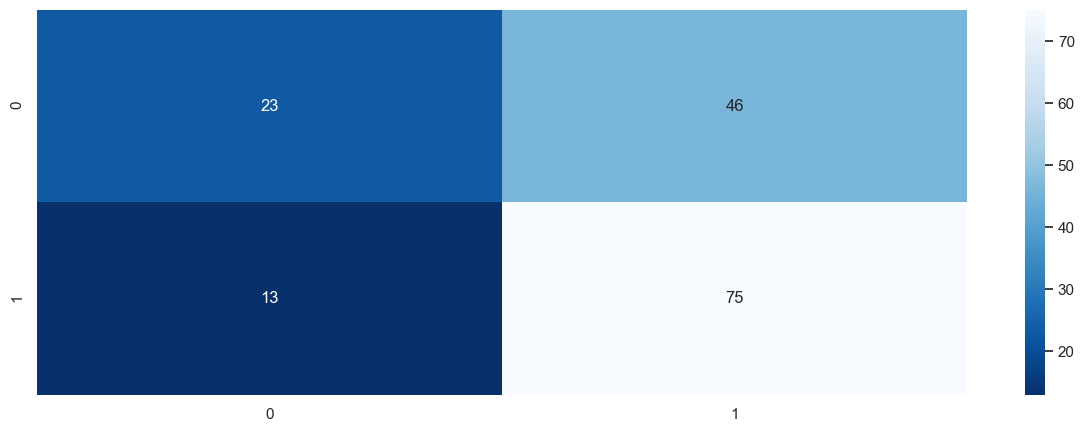

In [92]:
# матрица ошибок и сохраните её в переменную
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

#### Вывод:
    Для фермера важно выбрать корову с вкусным молоком, поэтому будем минимизировать  ошибки  Precision (False Positive).

### 6.2. Сведим критичную ошибку к нулю.

In [93]:
# вероятности классов
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred),
             columns = ['y_valid', 'y_proba', 'y_pred']).sort_values(by='y_proba',ascending=False)

print(display(data.head()))

,y_valid,y_proba,y_pred
85,1,0.839996,1
66,1,0.836255,1
110,1,0.830610,1
51,1,0.824471,1
146,1,0.821667,1


None


In [94]:
acc = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)

In [95]:
#Посмотрим на то, как модель будет работать при четырёх разных порогах.
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 2000,endpoint=False)]

In [96]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

#  столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(display(data.sample(5)))

,y_valid,y_proba,y_pred,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
60,1,0.643476,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
91,1,0.653539,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
155,0,0.607666,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
87,0,0.480258,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
75,0,0.669920,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


None


In [97]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('Порог = ',i ,'Precision = ', round(precision_score(y_test, data['y_pred_'+str(i)]), 2), 'TP =', cm[1][1])
        porog = i
        break

Порог =  0.83 Precision =  1.0 TP = 3


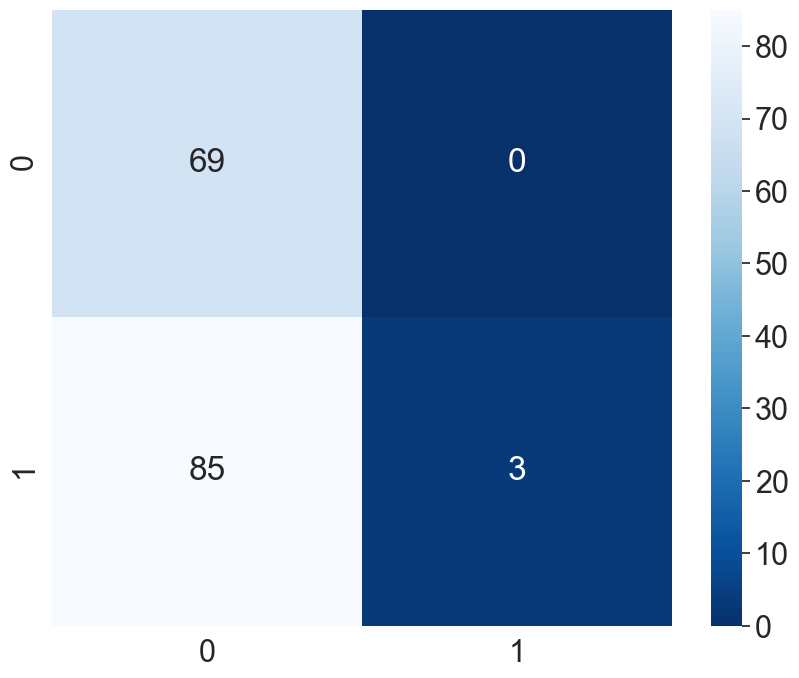

In [98]:
acc = round(accuracy_score(y_test, data['y_pred_'+str(porog)]), 2)
precision = round(precision_score(y_test, data['y_pred_'+str(porog)]), 2)
recall = round(recall_score(y_test, data['y_pred_'+str(porog)]), 2)

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [99]:
print('Accuracy:', acc) 
print('Recall:',  recall)
print('Precision:',  precision)

Accuracy: 0.46
Recall: 0.03
Precision: 1.0


**Вывод:** 
    Таким образом, мы нашли порог классификации 0.83 при котором модель ошибается в выборе молока 0 раз, при этом она точно определяет вкусное ли молоко, только у 3-х коров. 

### 6.3. Предскажем вкус молока у коров.

In [100]:
cow_buy.rename(columns={'ЭКЕ': 'ЭКЭ'}, inplace=True)

In [101]:
data_main = data_main.drop('ЭКЕ', axis = 1) 
ferma_main['Вкус молока'] = ferma_main['Вкус молока'].apply(lambda x: 'вкусно' if x ==1 else 'не вкусно')

In [108]:
#подготовка данных и разработка модели
data = data_main
y = 'Вкус молока'
cat_col_names = [ 'Порода','Тип пастбища', 'Порода папы быка','СПО (Сахаро-протеиновое соотношение)', 'Возраст']
num_col_names = ['ЭКЭ','Сырой протеин  г', 'Жирность %', 'Белок %']
    
    
# создание константы RANDOM_STATE
RANDOM_STATE = 42
# выделяем в отдельные переменные целевой признак и входные признаки
X = data.drop(y, axis=1)
y = data[y]

# разделяем данные на тренировочные и тестовые, зафиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)
    
# выбераем класс OneHotEncoder() для кодирования 
# задаём параметру sparse значение False
encoder = OneHotEncoder(sparse_output=False,  drop='first')

# обучаем и преобразуем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

# сохраняем в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()
# выбераем класс StandardScaler() для маштабирования 
scaler = StandardScaler()
# масштабируйте тренировочную  и тестовую выборки
X_train_scaler =  scaler.fit_transform(X_train[num_col_names])
X_test_scaler = scaler.transform(X_test[num_col_names]) 

# создаем ттаблицы закодированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaler, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaler, columns=num_col_names)

# объединяем таблицы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
# инициализация и обучение модели
clf  = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

X_cow = cow_buy
# выбераем класс OneHotEncoder() для кодирования 
# обучаем и преобразуем категориальные признаки из тест
X_cow_ohe = encoder.transform(X_cow[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()

# масштабируйте 
X_cow_scaler = scaler.transform(X_cow[num_col_names])

# создаем ттаблицы закодированных данных
X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_scaled = pd.DataFrame(X_cow_scaler, columns=num_col_names)

# объединяем таблицы
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)   
#y_pred = clf.predict(X_cow)

y_prod = clf.predict_proba(X_cow)[:,1] 

#cow_buy['y_pred'] = y_pred
cow_buy['y_prod'] = y_prod

cow_buy['Вкус молока'] = cow_buy['y_prod'].apply(lambda x: 'вкусно' if x > porog else 'не вкусно')      

cow_buy = cow_buy.sort_values(by = ['y_prod'], ascending = False)


display(cow_buy)

,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЭ,СПО (Сахаро-протеиновое соотношение),Сырой протеин г,Удой кг,y_prod,Вкус молока
17,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.908389,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6609.919297,0.908116,вкусно
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.906522,вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6344.707860,0.808273,не вкусно
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6593.089377,0.641905,не вкусно
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6571.259737,0.607737,не вкусно
15,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6593.089377,0.541368,не вкусно
11,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6617.928926,0.496492,не вкусно
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6283.999775,0.464878,не вкусно
14,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6283.999775,0.464878,не вкусно


In [109]:
#выведем 3 предсказанных правильно коров
cow_buy.loc[cow_buy['Вкус молока'] == 'вкусно']

,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЭ,СПО (Сахаро-протеиновое соотношение),Сырой протеин г,Удой кг,y_prod,Вкус молока
17,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.908389,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6609.919297,0.908116,вкусно
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.906522,вкусно


### Вывод: 
 При пороге классификации в 0.83 модель выдает только 3 коровы, которые могут дать вкусное молоко.

## 7. Итоговые выводы

### Учитывая полученные ранее данные с коровами по годовому удою выше 6000 кг и с признаком по вкусу молоко "вкусно" объеденим эти данные.

In [110]:
cow_buy.sort_values (by = ['Удой кг'], ascending = False).loc[(cow_buy['Удой кг'] >= 6000) & 
                                                               (cow_buy['Вкус молока'] == 'вкусно')]

,Порода,Тип пастбища,Порода папы быка,Имя папы,Жирность %,Белок %,Возраст,ЭКЕ (Энергетическая кормовая единица),ЭКЭ,СПО (Сахаро-протеиновое соотношение),Сырой протеин г,Удой кг,y_prod,Вкус молока
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,233.361138,более_0.92,2019.947532,6609.919297,0.908116,вкусно
17,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.908389,вкусно
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,более_0.92,2019.947532,6425.380218,0.906522,вкусно


* Мы изучили данные в трех таблицах. Признаки соответствуют описанию задачи и изученным в прошлых спринтах стандартам оформления данных. Найдены дубликаты в данных. Это исправили в предобработке данных.
*  Удалили дубликаты в таблице ferma_main. Проверили уникальные значения и выявили ошибки в данных(неявные дубликаты).Исправили, переименовав их. Пропусков не было обнаружино. Тип данный совпадает с данными указанными в таблицах.
* При рассмотрении Признака Удой кг выявленено максимальное значение 45616 кг. у Коровы с ID 17. Данный выброс был удален с двух таблиц ferma_main и ferma_dad. Средний удой коровы у фермера 6 125 кг., медиана - 6 132 кг. Будем рассматривать > 6100. У заказчика количество коров породой Айдиал и породой Соверин почти равны.У заказчика больше коров старше 2 лет.У заказчика больше вкусного молока, чем нет. Предложений коров Породой Рефлешн Соверинг большеб чем Вис Бик Айдиал.
* Судя по тепловой карте, самая сильная прямая связь с целевым признаком Удой кг у входных признаков СПО (0.81) и ЭКЕ (0.77) ,а ещё связь заметна между другими признаками.
При СПО < 0.92 Удой кг < 6000 кг.
Удой больше 6500 дают те коровы, у которых Жирность % ~3.7. И те коровы Жирность в % ~ 3.7 дают Удой кг стабильно от 6000 кг. Корелляция заметная, но не Высокая.
Линейная зависимость между признаками Удой кг и Сырой протеин, ЭКЕ
СПО - категориальный признак
мультиколлинеарность не наблюдается.
* После анализа данных были созданы 3 модели линейной ркгрессии. Третья модель по всем показателям лидировала.
Имела наименьший коэффициент детерминации, то есть в 82 % модель предсказывает верно.
Согласно остаточным ошибкам расспределено нормально без смещения, значит предсказания не сильно разняться с тестовыми значениями.
Если анализировать по метрикам: наименьшие значения в среднем предсказания отличающего от истинного значения у третьей модели.
С помощью модели предсказали **Удой** коров от представленных **Экофермой**. Оказалось, что все коровы будут приносить **Удой > 6000 кг**.
* Подготовлена модель логорифмической регрессии, где ошибки первого класса были минимизированы, с помощью порога 0.83 до 0 значений. Тем самым модель точно предсказывает только 3 значения.

### Проведенный анализ показал, что 3 коровы удовлетворяют требованиями фермера для приобритения этих буренок.